In [1]:
# import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score
from fep import FEP, load_features

In [2]:
def svm_model_evaluation(df):
    X = df.drop(columns=['outcome'])  
    y = df['outcome']                

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Model evaluation
    y_pred = svm_model.predict(X_test)
    y_proba = svm_model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)


In [3]:
def random_forest(df):
    X = df.drop(columns=['outcome'])  
    y = df['outcome']                


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    dt_model = RandomForestClassifier(n_estimators=5)
    dt_model.fit(X_train, y_train)


    importances = dt_model.feature_importances_
    feature_names = X.columns


    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Decision Tree")
    plt.show()


    y_pred = dt_model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    print(classification_report(y_test,y_pred))
    y_proba = dt_model.predict_proba(X_test)[:, 1]

    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)

In [4]:
# import data
bids = pd.read_csv('../Data/facebook/bids.csv')
bidder = pd.read_csv('../Data/facebook/train.csv')

In [5]:
bids

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl


aggiungere cella che dimostrsa il perchè della moda

In [6]:
# fill contry with the mode.
bids['country'].fillna(bids['country'].mode()[0], inplace = True)   

In [7]:
# encoding 
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)
bids.drop('bidder_id', axis=1, inplace=True)
bidder.drop('bidder_id', axis=1, inplace=True)

# drop useless bidder features
bidder.drop(['payment_account', 'address'], axis=1, inplace=True)

In [8]:
# extract and merge count features
count_for_bidder = bids.groupby("encoded_bidder_id").nunique()
df_train_bidder = pd.merge(bidder, count_for_bidder, on='encoded_bidder_id', how='left') # drop the right 
df_train_bidder = df_train_bidder.rename(columns = {'bid_id': 'N_bids', 'auction': 'N_auctions', 'merchandise': 'N_merchandise', 'device': 'N_device', 'time': 'N_time', 'country': 'N_country', 'ip': 'N_ip', 'url': 'N_url'})

In [9]:
temp = bids.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')

def calculate_entropy(values):
	total = sum(values)
	probabilities = [count / total for count in values]
	return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Calculate entropy for each bidder per auction
bids_per_auction_url_entropy = (
	temp.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

bids_per_auction_url_entropy

,encoded_bidder_id,url_entropy_per_auction
0,0,6.158347
1,1,5.696760
2,2,6.494542
3,3,2.407953
4,4,2.440489
...,...,...
6609,6609,-0.000000
6610,6610,-0.000000
6611,6611,-0.000000
6612,6612,-0.000000


In [10]:
df_train_bidder = pd.merge(df_train_bidder, bids_per_auction_url_entropy, on='encoded_bidder_id', how='left')
df_train_bidder

,outcome,encoded_bidder_id,N_bids,N_auctions,N_merchandise,N_device,N_time,N_country,N_ip,N_url,url_entropy_per_auction
0,0.0,1309,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,4.053509
1,0.0,2397,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,-0.000000
2,0.0,2514,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.000000
3,0.0,6527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.000000
4,0.0,238,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,3.564621
...,...,...,...,...,...,...,...,...,...,...,...
2008,0.0,4823,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,4.503258
2009,0.0,6495,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.000000
2010,0.0,2209,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,-0.000000
2011,0.0,5380,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.000000


In [11]:
# extract number of bids for something
df_train_bidder['bids/url'] = df_train_bidder['N_bids'] / df_train_bidder['N_url']
df_train_bidder['bids/ip'] = df_train_bidder['N_bids'] / df_train_bidder['N_ip']
df_train_bidder['bids/auctions'] = df_train_bidder['N_bids'] / df_train_bidder['N_auctions']
df_train_bidder['bids/country'] = df_train_bidder['N_bids'] / df_train_bidder['N_country']
df_train_bidder['bids/device'] = df_train_bidder['N_bids'] / df_train_bidder['N_device']
df_train_bidder = df_train_bidder.fillna(0) # fill NaN with 0 for bidders that never placed a bid

In [12]:
df_time = bids.drop(['bid_id', 'country', 'merchandise', 'device', 'url', 'ip', 'auction'],axis=1, inplace=False)
temp = df_time.copy()
df_time['difference'] = temp.groupby('encoded_bidder_id').diff() 
# we can drop NaN that are the first bid of each bidder
df_time.dropna(inplace = True)

count_concurrent_bids = df_time[df_time['difference']==0].groupby('encoded_bidder_id').count().drop('time', axis=1)
count_concurrent_bids.rename(columns = {'difference': 'count_concurrent_bids'}, inplace=True)
df_train_bidder = pd.merge(df_train_bidder, count_concurrent_bids, on='encoded_bidder_id', how='left').fillna(0)

temp = df_time.groupby('encoded_bidder_id')['difference'].describe()
temp.drop(['count'], axis=1, inplace=True)
temp.rename(columns = {'mean': 'mean_difference', 'std': 'std_difference', 'min': 'min_difference', 'max':'max_difference', '50%':'median_difference', '25%':'25_difference', '75%':'75_difference'}, inplace=True)
temp['iqrDiff'] = temp['75_difference']-temp['25_difference']
df_train_bidder = pd.merge(df_train_bidder, temp, on='encoded_bidder_id', how='left').fillna(0)

In [13]:
temp_df = bids.sort_values(['auction', 'time'])
winner_bids = temp_df.groupby('auction').max('time')
count_win = winner_bids.groupby('encoded_bidder_id').count().drop('time',axis=1, inplace=False).rename(columns = {'bid_id': 'N_win'})
df_train_bidder = pd.merge(df_train_bidder, count_win, on='encoded_bidder_id', how='left').fillna(0)
#df_train_bidder['percent_Win'] = df_train_bidder['N_win'] / df_train_bidder['N_bids']

In [14]:
temp_df = bids.sort_values(['auction', 'time'])
temp_df = temp_df.drop(['bid_id','merchandise','device','country','ip','url'],axis=1, inplace=False)

auct_duration = bids.sort_values(['auction', 'time'])[['encoded_bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction', 'time']].groupby('auction').quantile(0.75).reset_index()
auct_duration.rename(columns={'time': 'q75'}, inplace=True)

temp_df = temp_df.merge(auct_duration, on='auction')
temp_df.fillna(0)
bidder_q75_counts = temp_df.groupby('encoded_bidder_id').apply(lambda x: (x['time'] > x['q75']).sum()).reset_index(name='q75_bid_count')
df_train_bidder = pd.merge(df_train_bidder, bidder_q75_counts, on='encoded_bidder_id', how='left').fillna(0)

In [15]:
""" temp = pd.DataFrame()
temp["most_used_device"] = bids.groupby("encoded_bidder_id")["device"].agg(lambda x: x.value_counts().idxmax())
unique_device = bids["device"].unique() # encode the result with numbers
device_mapping = {device_id: idx for idx, device_id in enumerate(unique_device)}
temp['encoded_most_used_device'] = temp['most_used_device'].map(device_mapping)
temp.drop(['most_used_device'],axis=1, inplace=True)
df_train_bidder = pd.merge(df_train_bidder, temp, on='encoded_bidder_id', how='left') # drop the right 
df_train_bidder = df_train_bidder.fillna(0) # fill NaN with 0
df_train_bidder """

' temp = pd.DataFrame()\ntemp["most_used_device"] = bids.groupby("encoded_bidder_id")["device"].agg(lambda x: x.value_counts().idxmax())\nunique_device = bids["device"].unique() # encode the result with numbers\ndevice_mapping = {device_id: idx for idx, device_id in enumerate(unique_device)}\ntemp[\'encoded_most_used_device\'] = temp[\'most_used_device\'].map(device_mapping)\ntemp.drop([\'most_used_device\'],axis=1, inplace=True)\ndf_train_bidder = pd.merge(df_train_bidder, temp, on=\'encoded_bidder_id\', how=\'left\') # drop the right \ndf_train_bidder = df_train_bidder.fillna(0) # fill NaN with 0\ndf_train_bidder '

In [16]:
""" import numpy as np
import pandas as pd

def calculate_entropy(values):
    total = sum(values)
    probabilities = [count / total for count in values]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

def compute_entropy_for_feature(df, group_by, feature_name):
    temp = df.groupby(group_by)[feature_name].count().reset_index(name=f'{feature_name}_count')
    
    entropy_df = (
        temp.groupby(group_by[0])[f'{feature_name}_count']
        .apply(calculate_entropy)
        .reset_index(name=f'{feature_name}_entropy')
    )
    
    return entropy_df

features_to_calculate = ["device", "ip", "auction", "time", "country", "url"]

entropy_dfs = [compute_entropy_for_feature(bids, ['encoded_bidder_id', feature], feature) for feature in features_to_calculate]

final_entropy_df = entropy_dfs[0]
for df in entropy_dfs[1:]:
    final_entropy_df = final_entropy_df.merge(df, on="encoded_bidder_id", how="left")

final_entropy_df.head()
 """

' import numpy as np\nimport pandas as pd\n\ndef calculate_entropy(values):\n    total = sum(values)\n    probabilities = [count / total for count in values]\n    return -sum(p * np.log2(p) for p in probabilities if p > 0)\n\ndef compute_entropy_for_feature(df, group_by, feature_name):\n    temp = df.groupby(group_by)[feature_name].count().reset_index(name=f\'{feature_name}_count\')\n    \n    entropy_df = (\n        temp.groupby(group_by[0])[f\'{feature_name}_count\']\n        .apply(calculate_entropy)\n        .reset_index(name=f\'{feature_name}_entropy\')\n    )\n    \n    return entropy_df\n\nfeatures_to_calculate = ["device", "ip", "auction", "time", "country", "url"]\n\nentropy_dfs = [compute_entropy_for_feature(bids, [\'encoded_bidder_id\', feature], feature) for feature in features_to_calculate]\n\nfinal_entropy_df = entropy_dfs[0]\nfor df in entropy_dfs[1:]:\n    final_entropy_df = final_entropy_df.merge(df, on="encoded_bidder_id", how="left")\n\nfinal_entropy_df.head()\n '

In [17]:
df = df_train_bidder.drop(['encoded_bidder_id'],axis=1,inplace=False)
df.columns

Index(['outcome', 'N_bids', 'N_auctions', 'N_merchandise', 'N_device',
       'N_time', 'N_country', 'N_ip', 'N_url', 'url_entropy_per_auction',
       'bids/url', 'bids/ip', 'bids/auctions', 'bids/country', 'bids/device',
       'count_concurrent_bids', 'mean_difference', 'std_difference',
       'min_difference', '25_difference', 'median_difference', '75_difference',
       'max_difference', 'iqrDiff', 'N_win', 'q75_bid_count'],
      dtype='object')

In [18]:
# removing outliers
df = df.drop([615, 775, 392, 1669, 1102], axis = 0)

### Feature selection

In [19]:
X, y = df.drop(columns=['outcome']), df['outcome']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X.shape[1]

best_model = None
best_score = 0
best_features = []


all_features = list(range(n_features))


while n_features > 0:
    best = 0
    best_feature = None
    selected_features = best_features.copy()  # Mantieni le migliori feature selezionate fino a quel punto

    for feature in all_features:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            model = RandomForestClassifier(n_estimators=5, random_state=42)
            
            model.fit(X_train.iloc[:, current_features], y_train)
            y_pred = model.predict(X_validation.iloc[:, current_features])    

            # max recall
            #score = recall_score(y_validation, y_pred, average='weighted')

            # max auc score
            y_probs = model.predict_proba(X_validation.iloc[:, current_features])
            score = roc_auc_score(y_validation, y_probs[:, 1])

            # max f1
            #score = f1_score(y_validation, y_pred, average='weighted')

            if score > best:
                best = score
                best_feature = feature

    if best_feature is not None:
        best_features.append(best_feature)
        if best > best_score:
            best_score = best
            best_model = best_features.copy()  

    n_features -= 1  

print(f"Selected Features Index: {best_model}, score: {best_score}")
print(f"len: {len(best_model)}")


Selected Features Index: [18, 4, 16, 24, 22, 21, 9, 15, 5, 23, 19, 2, 0, 11], score: 0.9793555699481865
len: 14


In [20]:
selected_feature_names = X.columns[best_model]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['25_difference', 'N_time', 'std_difference', 'q75_bid_count', 'iqrDiff',
       'max_difference', 'bids/url', 'mean_difference', 'N_country', 'N_win',
       'median_difference', 'N_merchandise', 'N_bids', 'bids/auctions'],
      dtype='object')


### Oversampling SMOTE

In [21]:
X_train_selected = X_train.iloc[:, best_model]
X_validation_selected = X_validation.iloc[:, best_model]

In [22]:
from imblearn.over_sampling import SMOTE

# Applica SMOTE per bilanciare il dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

# Verifica il nuovo bilanciamento delle classi
print("Distribuzione dopo SMOTE:", pd.Series(y_resampled).value_counts())

Distribuzione dopo SMOTE: outcome
0.0    1524
1.0    1524
Name: count, dtype: int64


### Model validation

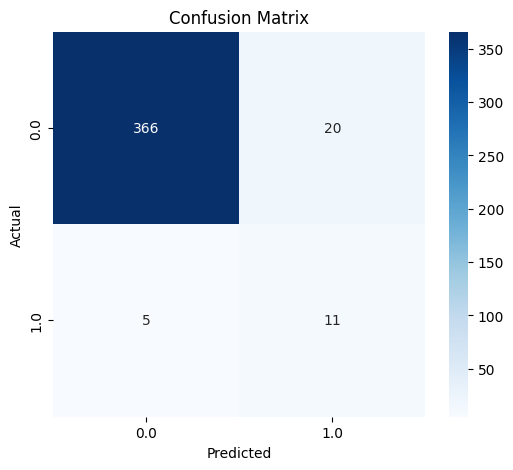

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       386
         1.0       0.35      0.69      0.47        16

    accuracy                           0.94       402
   macro avg       0.67      0.82      0.72       402
weighted avg       0.96      0.94      0.95       402



In [23]:
final_model = RandomForestClassifier(n_estimators=7, random_state=42)
final_model.fit(X_resampled, y_resampled)

y_pred = final_model.predict(X_validation_selected)

cm = confusion_matrix(y_validation, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_validation, y_pred))

In [24]:
y_probs = final_model.predict_proba(X_validation_selected)
roc_auc = roc_auc_score(y_validation, y_probs[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9156


In [25]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [5, 10, 50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # AUC-ROC as metric
    n_jobs=-1,  # Use all processors
    verbose=2   # messages
)

grid_search.fit(X_resampled, y_resampled)


# Best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best AUC score from cross-validation
best_auc = grid_search.best_score_
print(f"Best AUC-ROC Score from Grid Search: {best_auc:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Best AUC-ROC Score from Grid Search: 0.9940


In [26]:
# Train the best model on the entire training set
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf2 = RandomForestClassifier(**best_params, random_state=13)
best_rf3 = RandomForestClassifier(**best_params, random_state=21)
best_rf4 = RandomForestClassifier(**best_params, random_state=66)
models = [best_rf, best_rf2, best_rf3, best_rf4]
results = []
recalls = []
f1s = []

for rf in models:
    rf.fit(X_resampled, y_resampled)
    # Predict probabilities for validation set
    y_val_probs = best_rf.predict_proba(X_validation_selected)
    y_pred = best_rf.predict(X_validation_selected)
    # Compute AUC-ROC score
    val_auc = roc_auc_score(y_validation, y_val_probs[:, 1])
    recall = recall_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred)
    results.append(val_auc)
    recalls.append(recall)
    f1s.append(f1)

val_auc_mean = np.array(results).mean()
recall = np.array(recalls).mean()
f1 = np.array(f1s).mean()
print(f"Validation AUC-ROC Score (Mean): {val_auc_mean:.4f}")
print(f"Validation recall Score (Mean): {recall:.4f}")
print(f"Validation f1 Score (Mean): {f1:.4f}")

Validation AUC-ROC Score (Mean): 0.9461
Validation recall Score (Mean): 0.6875
Validation f1 Score (Mean): 0.4783


In [27]:
from fep import FEP, load_features
pipeline = FEP("On_Bidder.csv")
pipeline.save_features(df = df_train_bidder)